In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, pairwise_distances
from scipy.stats import chi2_contingency

#### Exploratory Data Analysis
- Analyzing distributions of all variables

In [2]:
# Reading the pre-processed data
df = pd.read_csv('Telco_Customer_Churn_Cleaned_Merged.csv')

In [3]:
df.drop(['country', 'state', 'lat_long', 'latitude', 'lat_long', 'longitude', 'customer_status', 'churn_value', 'churn_score', 'cltv', 
         'churn_category', 'churn_reason'], axis = 1, inplace= True)

In [4]:
df['population'].isnull().sum()

0

In [5]:
df.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'city', 'zip_code', 'population',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'churn_label'],
      dtype='object')

In [6]:
df.describe()

,age,under_30,senior_citizen,married,dependents,number_of_dependents,zip_code,population,referred_a_friend,number_of_referrals,...,unlimited_data,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_label
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.198921,0.162147,0.483033,0.231010,0.468692,93486.070567,22139.603294,0.457476,1.951867,...,0.673719,0.592219,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370
std,16.750352,0.399217,0.368612,0.499748,0.421508,0.962802,1856.767505,21152.392837,0.498224,3.001199,...,0.468885,0.491457,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90001.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92101.000000,2344.000000,0.000000,0.000000,...,0.000000,0.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93518.000000,17554.000000,0.000000,0.000000,...,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95329.000000,36125.000000,1.000000,3.000000,...,1.000000,1.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,9.000000,96150.000000,105285.000000,1.000000,11.000000,...,1.000000,1.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000


In [7]:
numerical_variables = ['age', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges',
                        'avg_monthly_gb_download', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 
                        'total_revenue']
print(len(numerical_variables))
df[numerical_variables].describe()

11


,age,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


#### Plotting the distribution of the Numerical Features

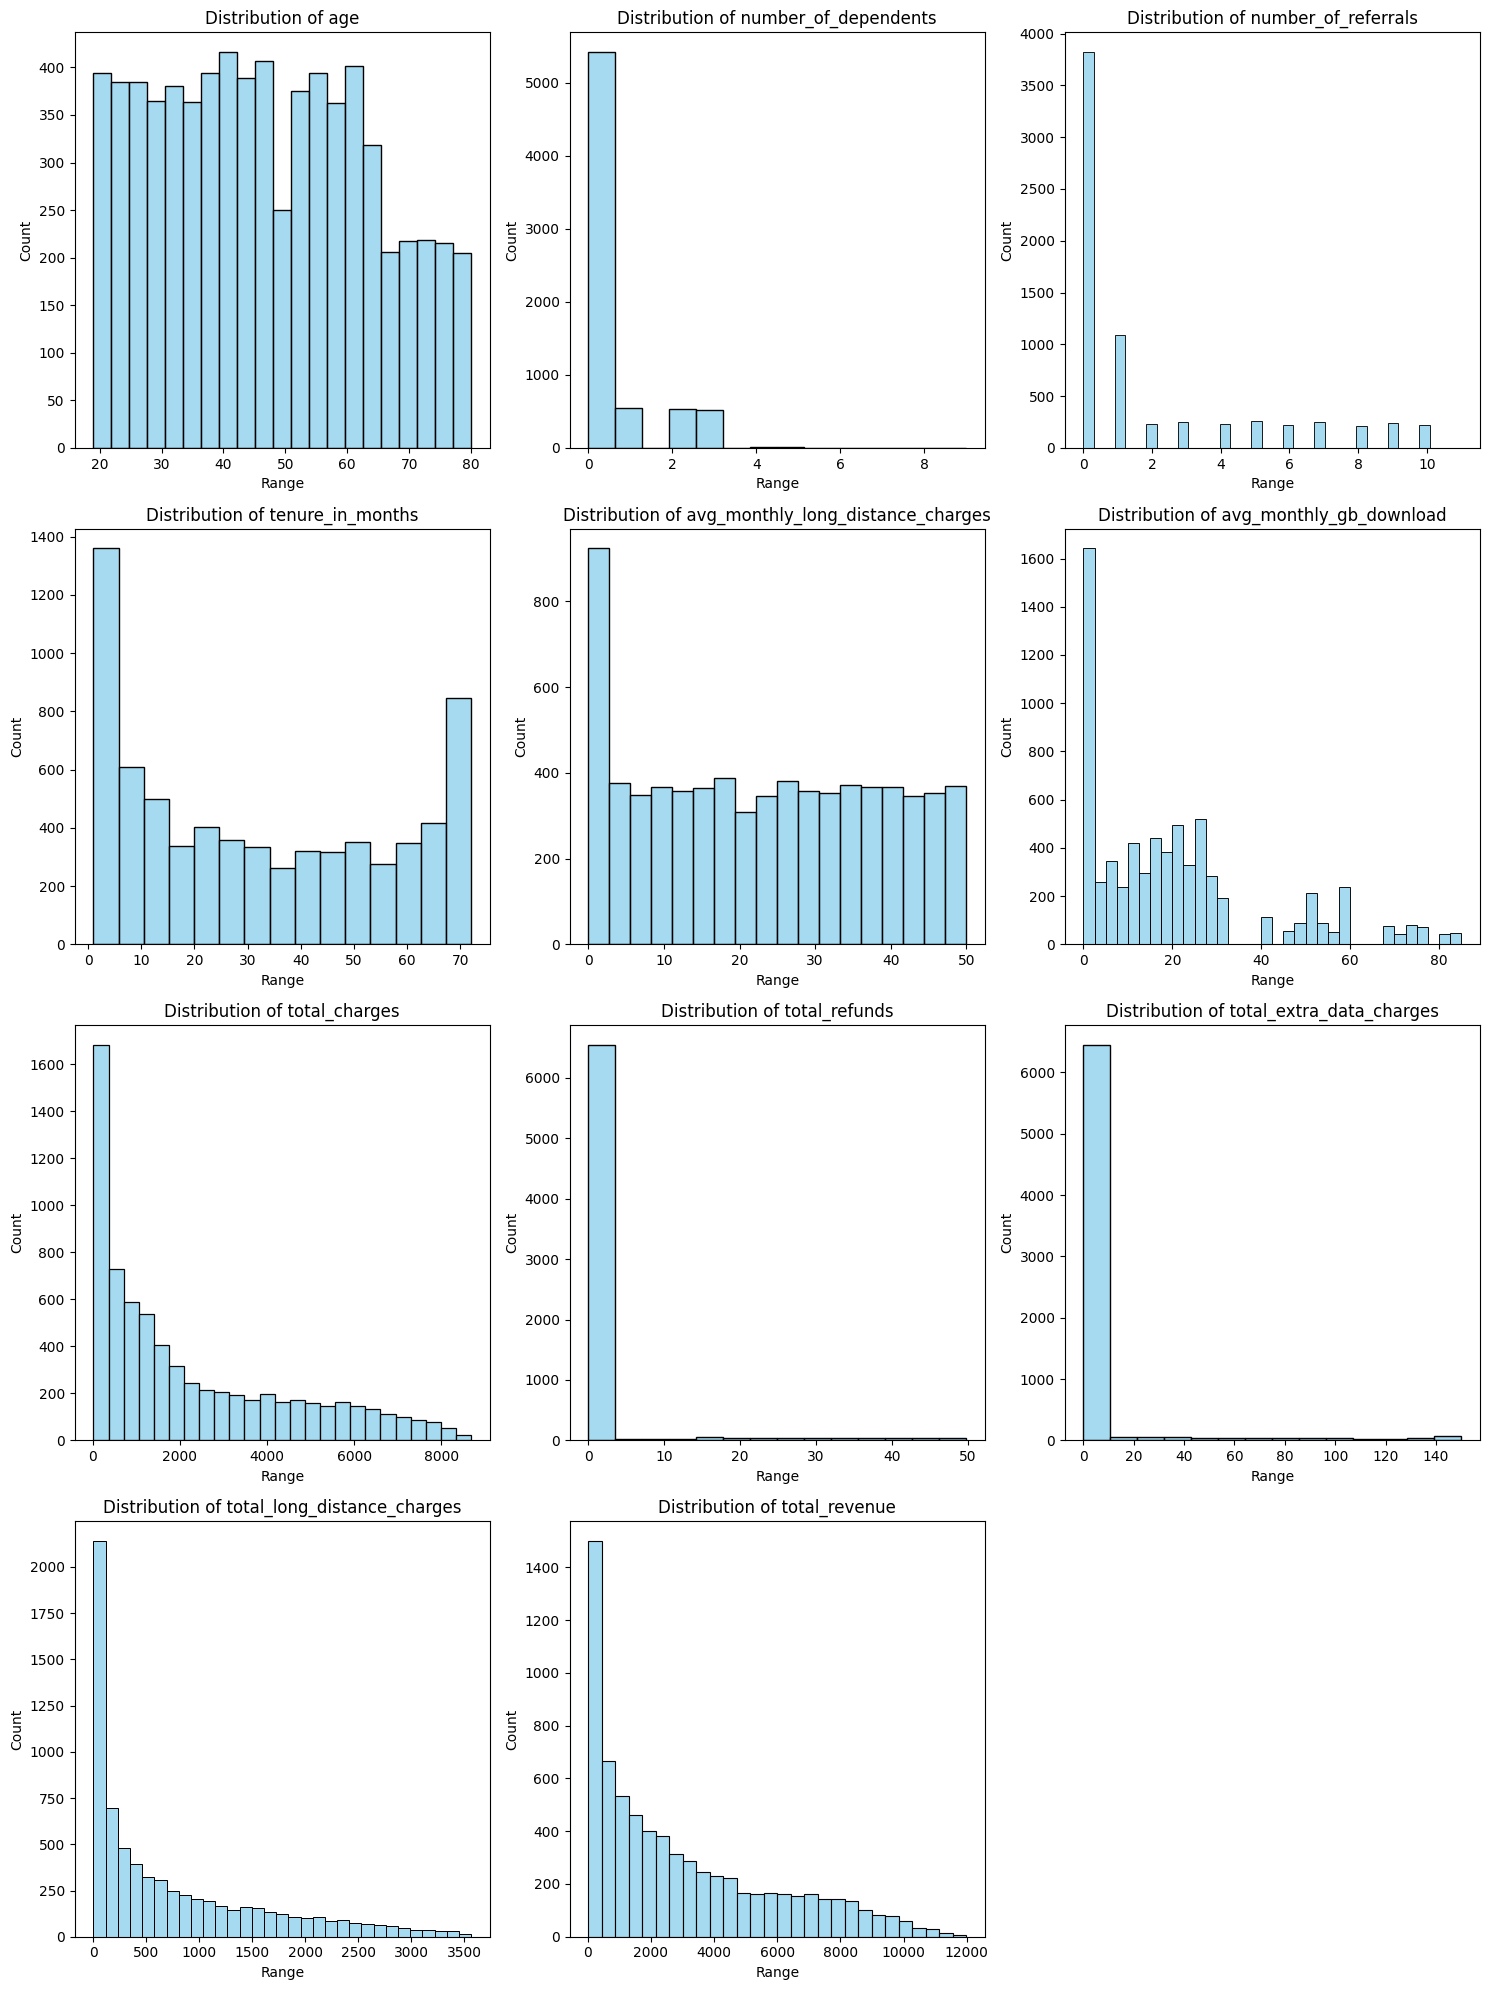

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(numerical_variables):
    sns.histplot(data=df, x=feature, ax=axes[i], color='skyblue', stat='count')
    axes[i].set_xlabel('Range')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    
if len(numerical_variables) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

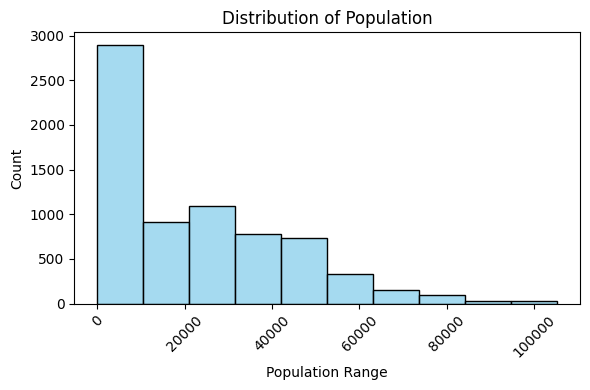

In [9]:
num_bins = 10
df['population_binned'] = pd.cut(df['population'], bins=num_bins)

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='population', bins=num_bins, color='skyblue', stat='count')

plt.xlabel('Population Range')
plt.ylabel('Count')
plt.title('Distribution of Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- No offer applied to the customers changed to No_offer category in the offer feature

In [10]:
df['offer'].replace({None: 'No_offer'}, inplace=True)

In [11]:
categorical_variables = ['gender', 'under_30', 'married', 'dependents', 'referred_a_friend', 'offer', 'phone_service',
                         'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection_plan',
                         'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music',	'unlimited_data', 'contract',
                         'paperless_billing', 'payment_method', 'satisfaction_score', 'churn_label']
len(categorical_variables)

22

#### Plotting the distribution of the Categorical Features

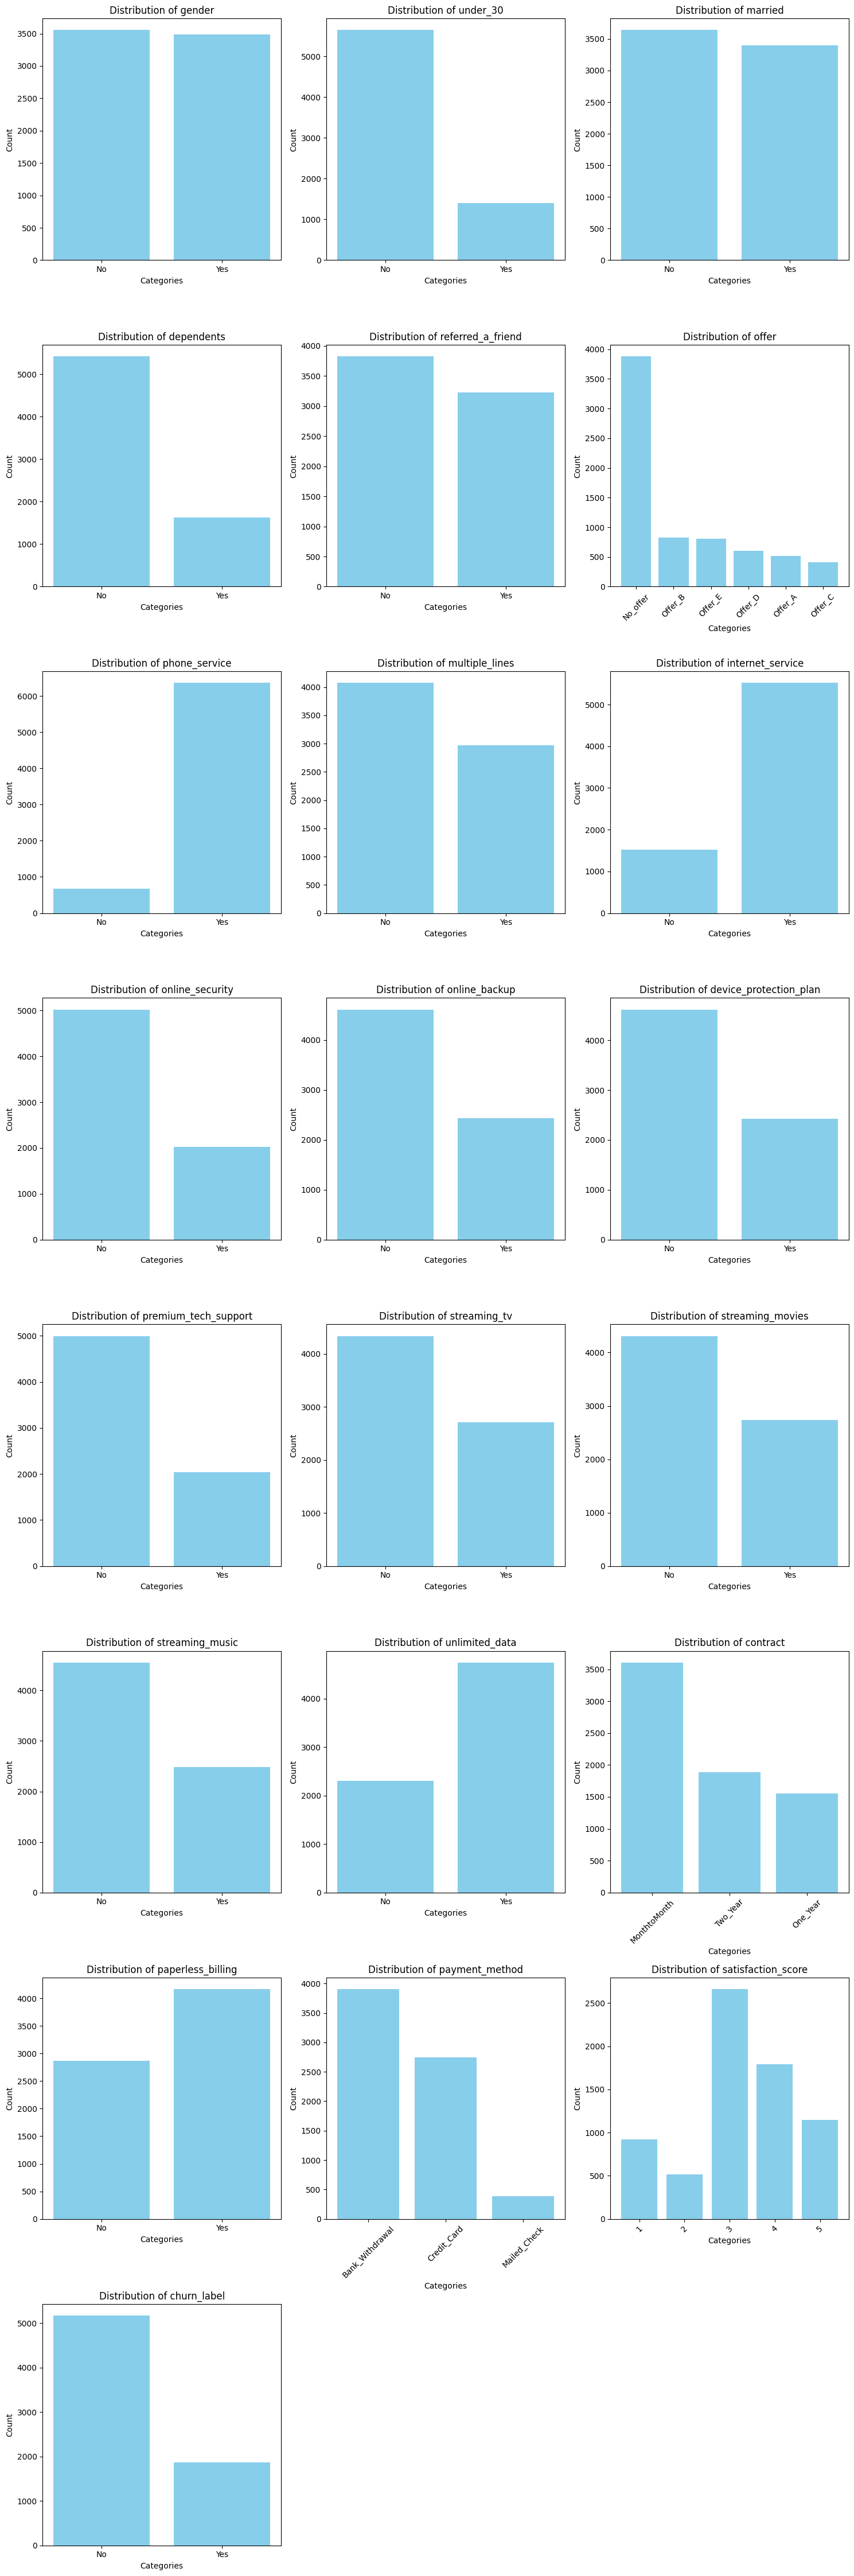

In [12]:
fig, axes = plt.subplots(8, 3, figsize=(15, 45))
axes = axes.flatten()  

for i, feature in enumerate(categorical_variables):
    category_counts = df[feature].value_counts()
    
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    if df[feature].nunique() == 2:
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['No', 'Yes'])
    else:
        axes[i].tick_params(axis='x', rotation=45)
    
    if len(categorical_variables) % 2 != 0:
        fig.delaxes(axes[-1])

total_plots = len(categorical_variables)
for j in range(len(axes)):
    if j >= total_plots:
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Understanding and defining Treatment and Outcome

- Treatment variable -> offer & contract
- Outcome variable -> churn_label

- Understanding the distribution of the churned and retained customer with the two treatments, offer and contract

In [13]:
def treatment_on_outcome(df, treatment):
    cross_tab = pd.crosstab(df[treatment], df['churn_label'], normalize='index')

    cross_tab_percentage = cross_tab * 100

    cross_tab_count = cross_tab_percentage.copy()
    cross_tab_count['count'] = df[treatment].value_counts()

    cross_tab_sorted = cross_tab_count.sort_values(by=1, ascending=False)
    print(f'For {treatment} on Churn Label \n')
    print(cross_tab_sorted, '\n')

In [14]:
treatment_on_outcome(df, 'offer')
treatment_on_outcome(df, 'contract')

For offer on Churn Label 

churn_label          0          1  count
offer                                   
Offer_E      47.080745  52.919255    805
No_offer     72.891411  27.108589   3877
Offer_D      73.255814  26.744186    602
Offer_C      77.108434  22.891566    415
Offer_B      87.742718  12.257282    824
Offer_A      93.269231   6.730769    520 

For contract on Churn Label 

churn_label           0          1  count
contract                                 
MonthtoMonth  54.155125  45.844875   3610
One_Year      89.290323  10.709677   1550
Two_Year      97.450876   2.549124   1883 



- Checking correlation of features with churn label

In [15]:
correlating_variables = ['age', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges',
                        'avg_monthly_gb_download', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 
                        'total_revenue', 'under_30', 'married', 'dependents', 'phone_service',
                         'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection_plan',
                         'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music',	'unlimited_data',
                         'paperless_billing','churn_label']

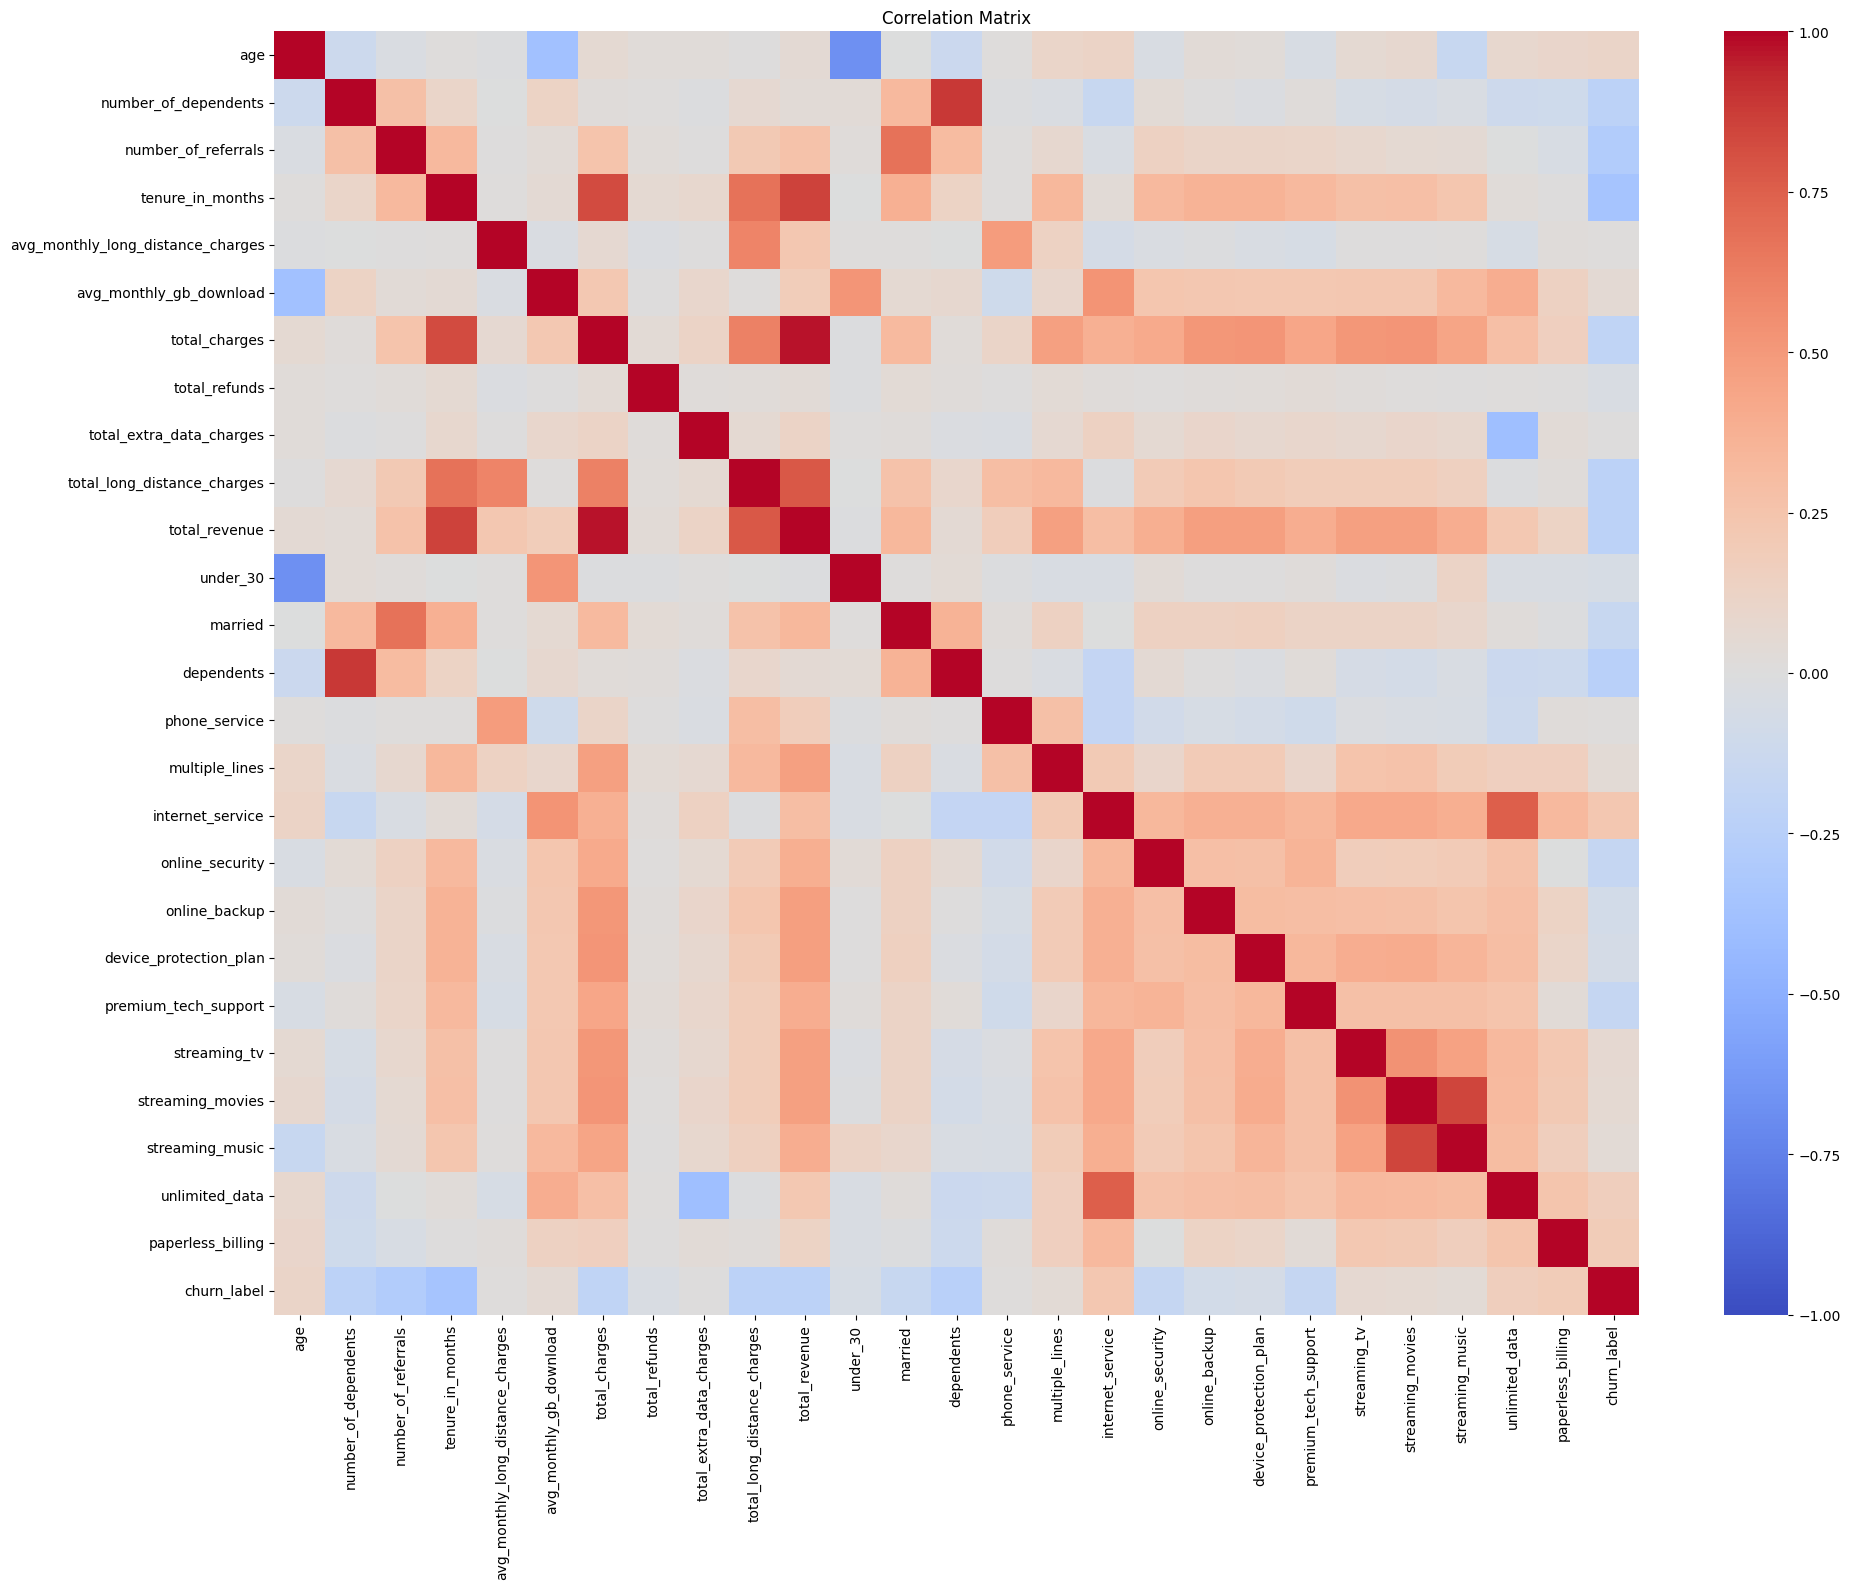

In [16]:
correlation_matrix = df[correlating_variables].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- Checking correlation of the churn label with confounders

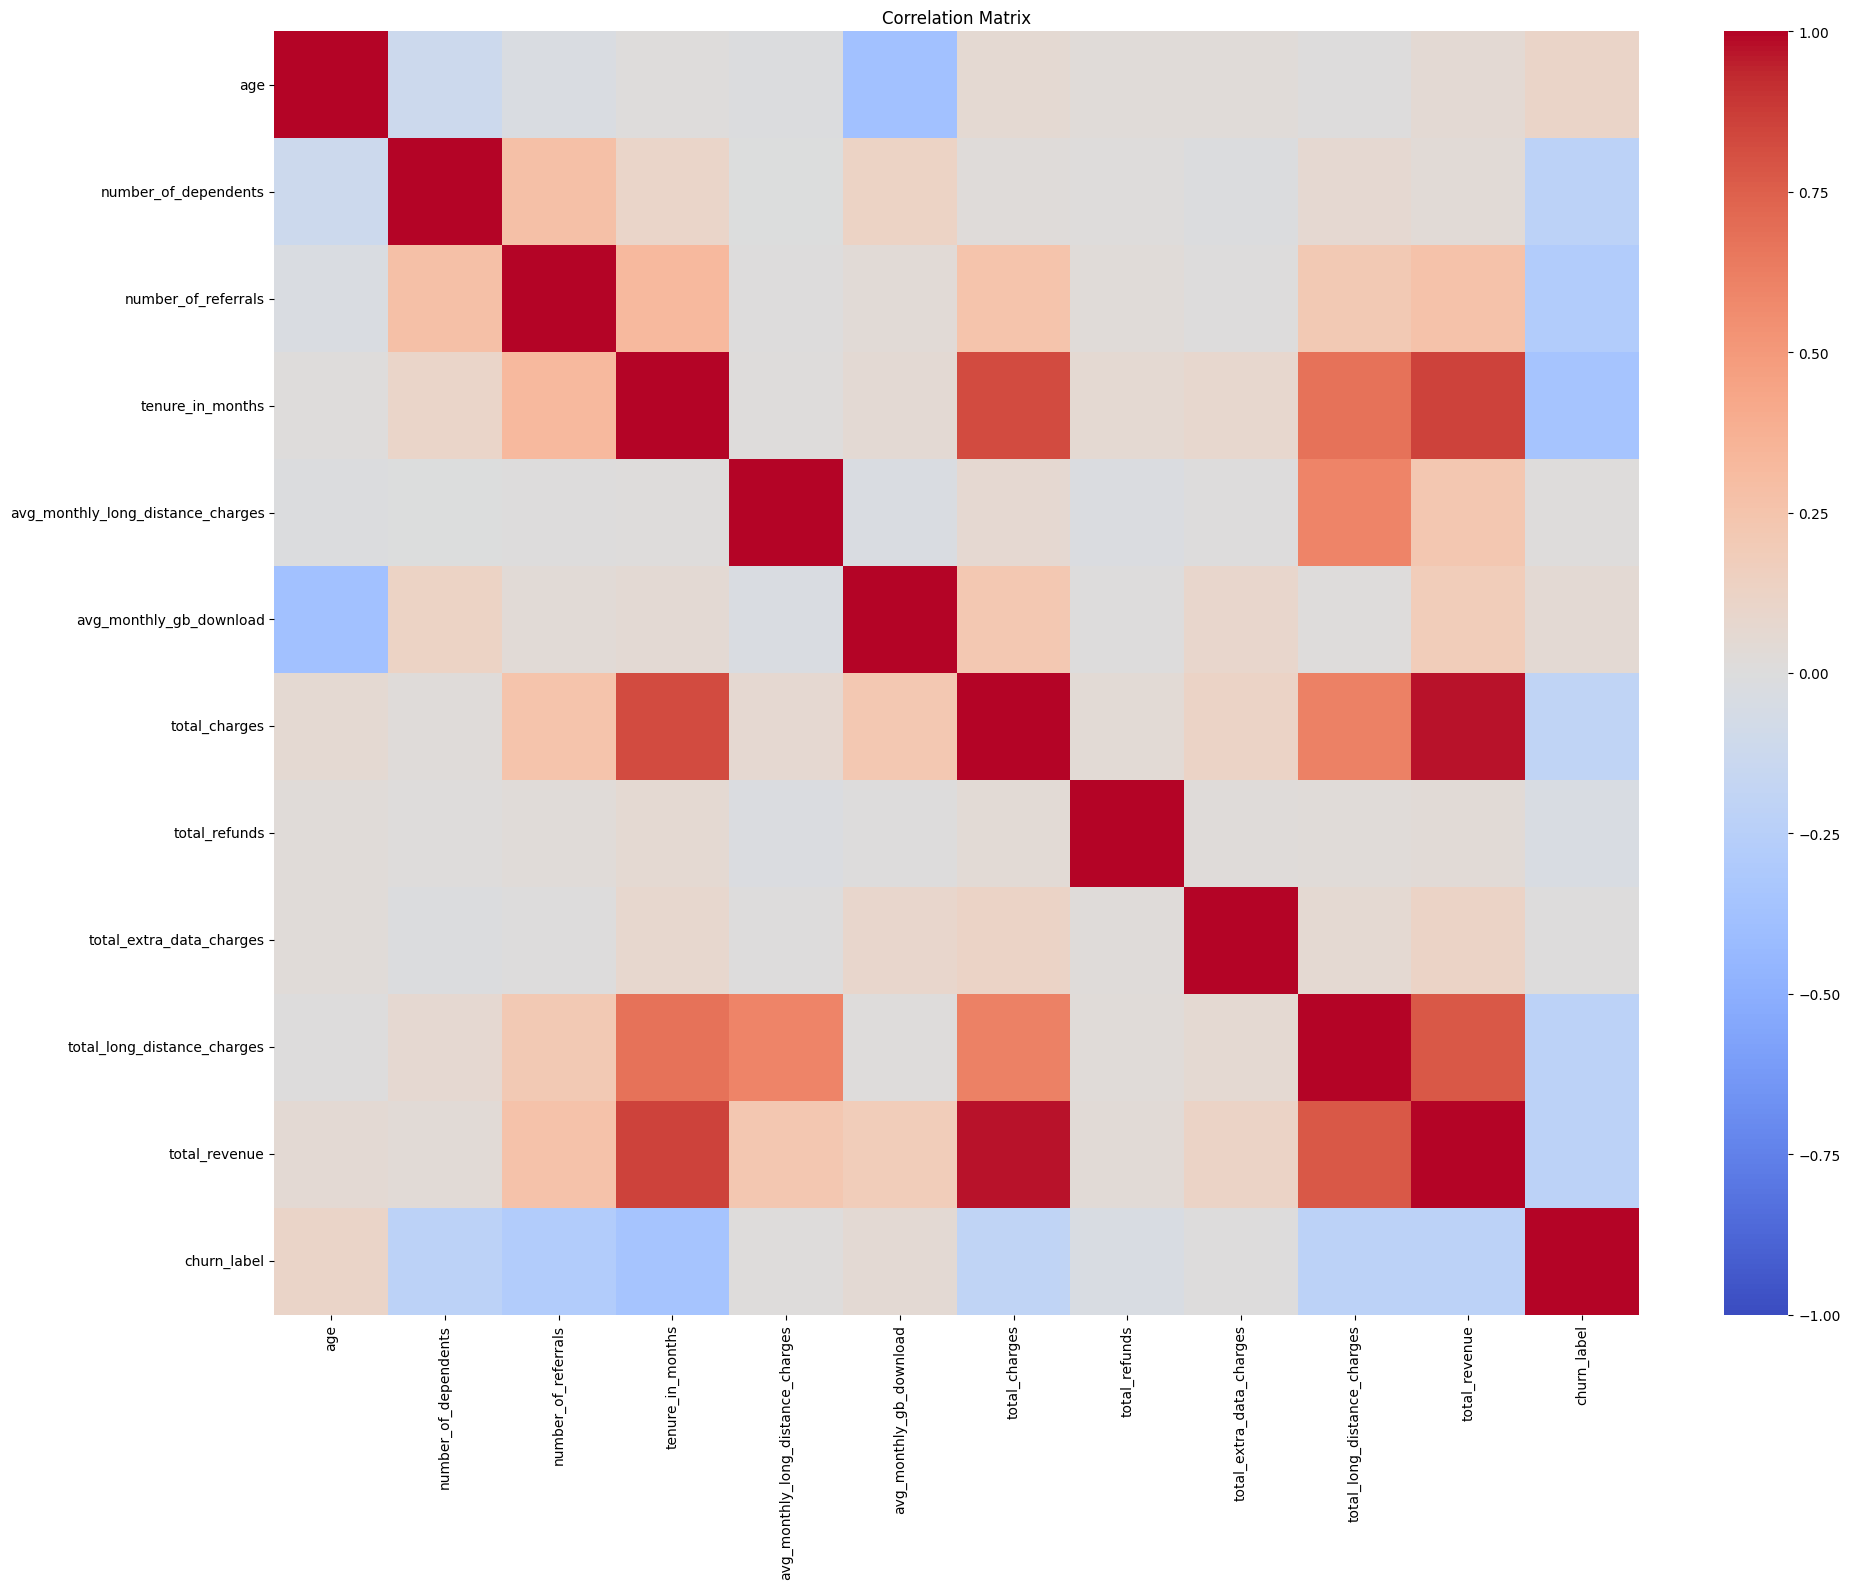

In [17]:
churn_label = ['churn_label']
correlating_variables = numerical_variables + churn_label
correlation_matrix = df[correlating_variables].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- Understanding the treatment - contract and offer relation

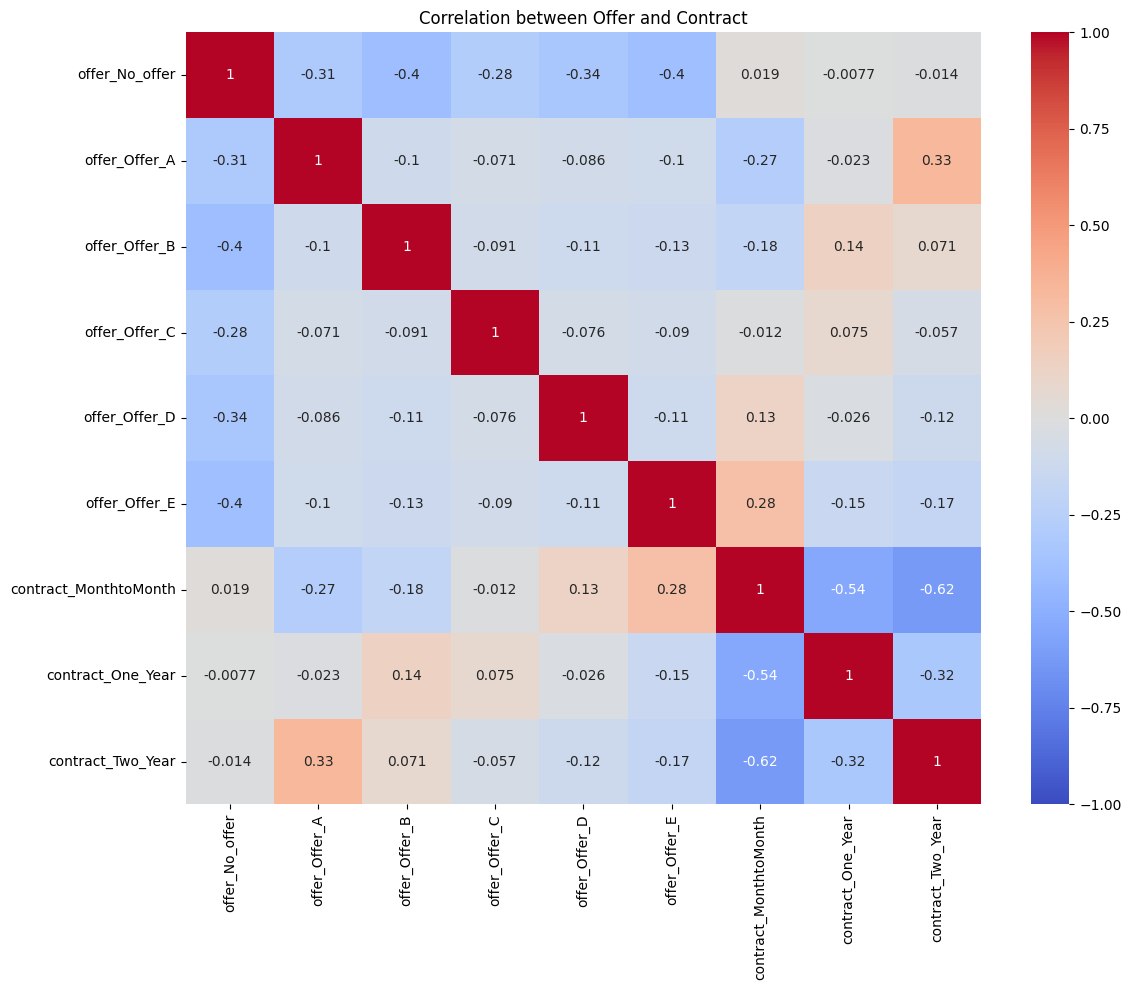

In [18]:
df_dummy = pd.get_dummies(df[['offer', 'contract']])

correlation = df_dummy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Offer and Contract')
plt.tight_layout()
plt.show()

In [19]:
contingency_table = pd.crosstab(df['offer'], df['contract'])

# Performing chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-square statistic: 1629.6820991848783
p-value: 0.0


- A significance correlation of contract and offer suggest that both features (target/treatment) are representing same flow of relation, but combined. This combined effect may overshadow other categories of both of the features.
- Dropping one of the feature can be a solution as it helps with model being simpler.
- Dropping contract feature as the categories deviate too much while offer feature categories is normal.

In [20]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

cramer_v = cramers_v(contingency_table)
print(f"Cramér's V: {cramer_v}")

Cramér's V: 0.3401399202601758


#### Case 1: Offer vs No Offer

#### Propensity Score Estimation

- Using logistic regression to estimate propensity scores
- Including all relevant covariates and potential confounders in the model
- Evaluating the model's performance using AUC

In [21]:
# Defining the confounders and other covariates
confounders = ['age', 'tenure_in_months', 'total_revenue', 'dependents', 'contract']
covariates = ['gender', 'internet_service', 'phone_service']
variables_for_psm = confounders + covariates

# Creating treatment feature extracting No_Offer as 0 and other Offers as 1
df['treatment'] = (df['offer'] != 'No_offer').astype(int)

X = df[variables_for_psm]

# Defining target
y = df['churn_label']
treatment = df['treatment']

# SPlitting the data into train and test for both the Variables, Treatment and Target
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42, 
    stratify=df[['treatment']])

# Following train and test data are merged and will be used in many instances in this project
train_data = pd.concat([X_train, treatment_train, y_train], axis=1)
test_data = pd.concat([X_test, treatment_test, y_test], axis=1)

In [22]:
# Transforming the Categorical and Numerical variables to correct types
cat_columns = X.select_dtypes(include=['object', 'category']).columns
num_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Num -> Standardized
# Cat -> One-Hot Encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_columns)
    ])

# Propensity Score Estimation
def fit_propensity_model(X, treatment):
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, tol=1e-4))
    ])
    model.fit(X, treatment)
    return model, model.predict_proba(X)[:, 1]

# Fitting PSM
propensity_model, propensity_scores = fit_propensity_model(X_train, treatment_train)

# Evaluating model
treatment_auc = roc_auc_score(treatment_train, propensity_scores)

print("Treatment model AUC:", treatment_auc)

# Adding fitted propensity scores to the train data
train_data['propensity_score'] = propensity_scores

# Adding predicted propensity scores to the test data
propensity_scores_test = propensity_model.predict_proba(X_test)[:, 1]

# Adding propensity scores to the test data
test_data['propensity_score'] = propensity_scores_test

# test_data.set_index('age', inplace=True)
# train_data.set_index('age', inplace=True)

test_data.to_csv('Test_Data_with_PS.csv')
train_data.to_csv('Train_Data_with_PS.csv')
print(train_data.head())

Treatment model AUC: 0.5335689504792782
      age  tenure_in_months  total_revenue  dependents      contract  gender  \
1543   38                 1          89.54           0  MonthtoMonth  Female   
2864   26                72        7807.35           1      Two_Year  Female   
1644   78                13        1599.51           0  MonthtoMonth    Male   
2231   41                67        8414.43           0      One_Year  Female   
1819   74                37        5300.09           0  MonthtoMonth    Male   

      internet_service  phone_service  treatment  churn_label  \
1543                 1              1          0            0   
2864                 1              1          0            0   
1644                 1              1          1            1   
2231                 1              1          1            1   
1819                 1              1          0            1   

      propensity_score  
1543          0.424977  
2864          0.490069  
1644         

### Matching and Balacing

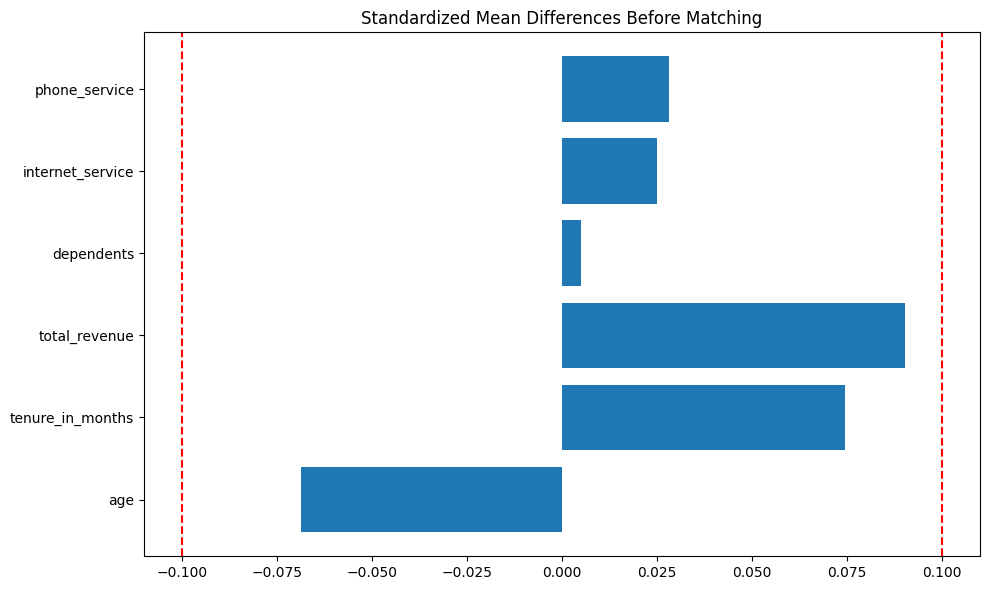

In [23]:
# Calculating standardized mean difference
# A simple measure to check the balance of the two groups
def smd(x1, x2):
    return (np.mean(x1) - np.mean(x2)) / np.sqrt((np.var(x1) + np.var(x2)) / 2)

# Here Calculating SMD for each variable before matching (Only for Numerical Variables)
smd_before = {}
for var in variables_for_psm:
    if var in num_columns:
        smd_before[var] = smd(X_train[treatment_train == 1][var], X_train[treatment_train == 0][var])

# SMD before matching
plt.figure(figsize=(10, 6))
plt.barh(list(smd_before.keys()), list(smd_before.values()))
plt.axvline(x=0.1, color='r', linestyle='--')
plt.axvline(x=-0.1, color='r', linestyle='--')
plt.title('Standardized Mean Differences Before Matching')
plt.tight_layout()
plt.show()

### Matching and Balancing 
- Including Propensity Score

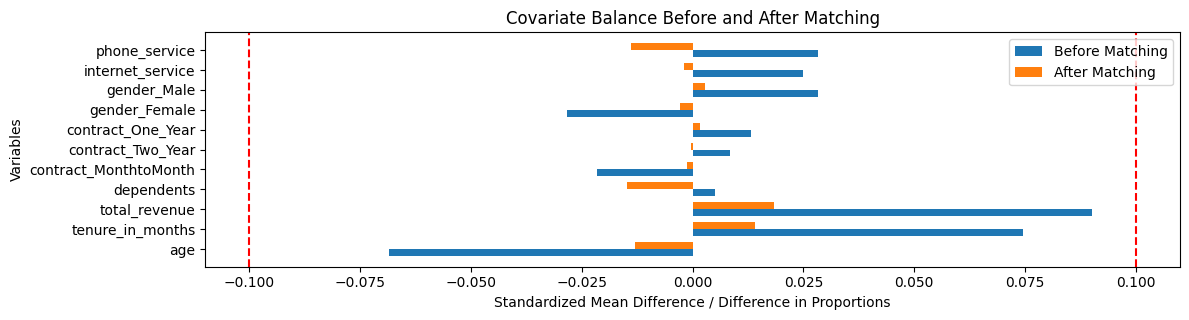

In [24]:
# Matching the treated unit with similar or same propensity score using nearest neighbour
# For each treated unit, it finds the closest control unit within the caliper distance
def nearest_neighbor_matching(data, treatment_col, ps_col, caliper=0.2):
    
    treated = data[data[treatment_col] == 1].copy()
    control = data[data[treatment_col] == 0].copy()
    
    treated['matched'] = 0
    control['matched'] = 0
    
    matches = []
    
    for idx, treated_unit in treated.iterrows():
        ps_treated = treated_unit[ps_col]
        
        control['distance'] = abs(control[ps_col] - ps_treated)
        eligible_controls = control[(control['distance'] < caliper) & (control['matched'] == 0)]
        
        if not eligible_controls.empty:
            match = eligible_controls.loc[eligible_controls['distance'].idxmin()]
            matches.append((treated_unit, match))
            treated.at[idx, 'matched'] = 1
            control.at[match.name, 'matched'] = 1
    
    matched_data = pd.concat([unit for pair in matches for unit in pair], axis=1).T
    return matched_data

matched_data = nearest_neighbor_matching(train_data, 'treatment', 'propensity_score')

# Balacing the two groups which are matched in the above step
def calculate_smd(x1, x2):
    return (np.mean(x1) - np.mean(x2)) / np.sqrt((np.var(x1) + np.var(x2)) / 2)

# Assessing the balance of matched and unmatched units both before and after effect of propensity score for visualizing
def assess_balance(unmatched_data, matched_data, treatment_col, variables):
    smd_before = {}
    smd_after = {}
    
    for var in variables:
        if unmatched_data[var].dtype in ['int64', 'float64']:
            treated_before = unmatched_data[unmatched_data[treatment_col] == 1][var]
            control_before = unmatched_data[unmatched_data[treatment_col] == 0][var]
            smd_before[var] = calculate_smd(treated_before, control_before)
            
            treated_after = matched_data[matched_data[treatment_col] == 1][var]
            control_after = matched_data[matched_data[treatment_col] == 0][var]
            smd_after[var] = calculate_smd(treated_after, control_after)
        else:
            for category in unmatched_data[var].unique():
                var_cat = f"{var}_{category}"
                prop_treated_before = (unmatched_data[unmatched_data[treatment_col] == 1][var] == category).mean()
                prop_control_before = (unmatched_data[unmatched_data[treatment_col] == 0][var] == category).mean()
                smd_before[var_cat] = prop_treated_before - prop_control_before
                
                prop_treated_after = (matched_data[matched_data[treatment_col] == 1][var] == category).mean()
                prop_control_after = (matched_data[matched_data[treatment_col] == 0][var] == category).mean()
                smd_after[var_cat] = prop_treated_after - prop_control_after
    
    return smd_before, smd_after

smd_before, smd_after = assess_balance(train_data, matched_data, 'treatment', variables_for_psm)

# Visualizing balance
def plot_balance(smd_before, smd_after):
    plt.figure(figsize=(12, len(smd_before) * 0.3))
    
    variables = list(smd_before.keys())
    x = np.arange(len(variables))
    width = 0.35
    
    plt.barh(x - width/2, list(smd_before.values()), width, label='Before Matching')
    plt.barh(x + width/2, list(smd_after.values()), width, label='After Matching')
    
    plt.axvline(x=0.1, color='r', linestyle='--')
    plt.axvline(x=-0.1, color='r', linestyle='--')
    plt.ylabel('Variables')
    plt.xlabel('Standardized Mean Difference / Difference in Proportions')
    plt.title('Covariate Balance Before and After Matching')
    plt.yticks(x, variables)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_balance(smd_before, smd_after)

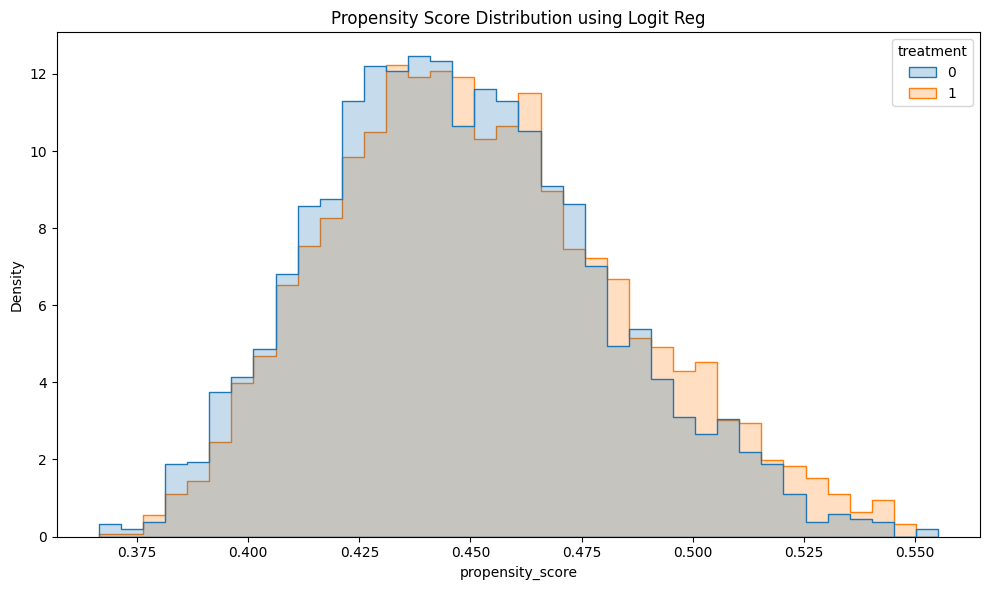

In [25]:
# Visualizing to check treated and control group distribution using propesneity score matching
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='propensity_score', hue='treatment', element='step', stat='density', common_norm=False)
plt.title('Propensity Score Distribution using Logit Reg')
plt.tight_layout()
plt.show()

In [26]:
# Checking the balance using statistical tests
def statistical_balance_test(matched_data, variables):
    results = {}
    for var in variables:
        treated = matched_data[matched_data['treatment'] == 1][var]
        control = matched_data[matched_data['treatment'] == 0][var]
        
        if matched_data[var].dtype in ['int64', 'float64']:
            # Continuous variables -> t-test
            t_stat, p_value = stats.ttest_ind(treated, control)
            results[var] = {'test': 't-test', 'statistic': t_stat, 'p-value': p_value}
        else:
            # Categorical variables -> chi-square test
            contingency_table = pd.crosstab(matched_data['treatment'], matched_data[var])
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            results[var] = {'test': 'chi-square', 'statistic': chi2, 'p-value': p_value}
    
    return pd.DataFrame(results).T

balance_test_results = statistical_balance_test(matched_data, variables_for_psm)
print(balance_test_results)

                        test  statistic   p-value
age               chi-square  52.052922  0.785889
tenure_in_months  chi-square  57.532797  0.875709
total_revenue     chi-square     5038.0  0.461628
dependents        chi-square   0.247125  0.619107
contract          chi-square   0.018359  0.990863
gender            chi-square   0.028475  0.865998
internet_service  chi-square   0.001185  0.972541
phone_service     chi-square   0.198344  0.656061


- p-value of the confounders ~0.80+ suggests a good fit of the matched data

### Estimating ATE

In [27]:
# Simple ATE calculation
def calculate_ate(data, treatment_col, outcome_col):
    treated = data[data[treatment_col] == 1][outcome_col]
    control = data[data[treatment_col] == 0][outcome_col]
    
    ate = np.mean(treated) - np.mean(control)
    
    # Calculating standard error and confidence interval
    se = np.sqrt(np.var(treated)/len(treated) + np.var(control)/len(control))
    ci_lower, ci_upper = ate - 1.96*se, ate + 1.96*se
    
    return ate, (ci_lower, ci_upper)

matched_data['churn_label'] = pd.to_numeric(matched_data['churn_label'], errors='coerce')

ate, ci = calculate_ate(matched_data, 'treatment', 'churn_label')

print(f"Average Treatment Effect: {ate:.4f}")
print(f"95% Confidence Interval: ({ci[0]:.4f}, {ci[1]:.4f})")

# statistical significance check
treated_group = matched_data[matched_data['treatment'] == 1]['churn_label'].dropna()
control_group = matched_data[matched_data['treatment'] == 0]['churn_label'].dropna()

t_stat, p_value = stats.ttest_ind(treated_group, control_group)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Average Treatment Effect: -0.0075
95% Confidence Interval: (-0.0315, 0.0165)
T-statistic: -0.6122
P-value: 0.5405


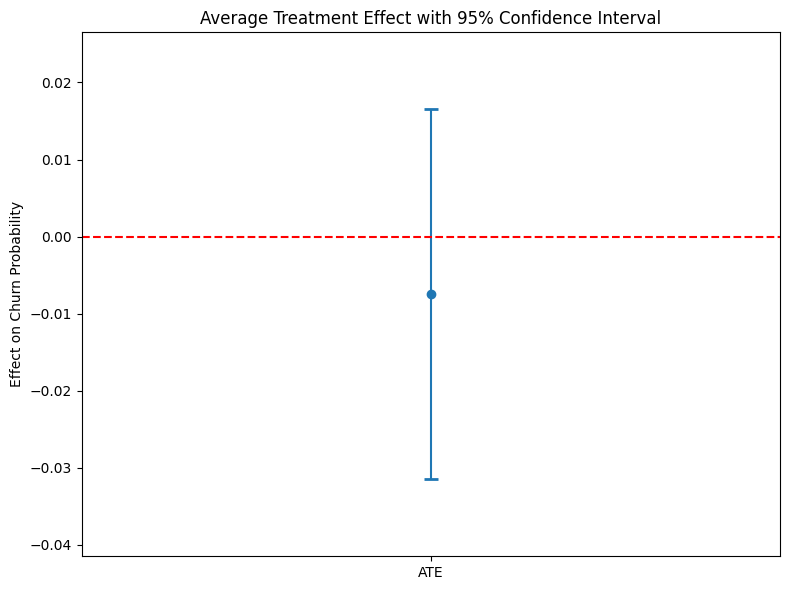

In [28]:
# Visualizing how well is the model against churn
plt.figure(figsize=(8, 6))
plt.errorbar(['ATE'], [ate], yerr=[[ate - ci[0]], [ci[1] - ate]], 
             fmt='o', capsize=5, capthick=2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Average Treatment Effect with 95% Confidence Interval')
plt.ylabel('Effect on Churn Probability')
plt.ylim(min(ci[0] - 0.01, -0.01), max(ci[1] + 0.01, 0.01))
plt.tight_layout()
plt.show()

- The above statistics shows that the receiving an offer decreases the probablility of churn
- Negative sign indicates reduction in churn
- Allthough the churn percent is only 0.75 which is not much, which can be understood by Significance Interval which is below 5% mark.
- Offers does have an causal effect on churn but with a very insignificant effect.

#### Case 2: Individual Offers on Churn

#### Propensity Score Estimation

In [29]:
df_offers = df[df['offer'] != 'No_offer'].copy()

# Creating Dummy variables for offers
df_offers = pd.get_dummies(df_offers, columns=['offer'], prefix='offer')

numerical_features = ['age', 'tenure_in_months', 'total_revenue', 'dependents']
categorical_features = ['contract', 'gender', 'internet_service', 'phone_service']
variables_for_ps = numerical_features + categorical_features

# Identifying offer columns
offer_columns = [col for col in df_offers.columns if col.startswith('offer_')]

def propensity_score_matching(X, treatment, outcome, caliper=0.2):
    X = X.values if isinstance(X, pd.DataFrame) else X
    treatment = treatment.values if isinstance(treatment, pd.Series) else treatment
    outcome = outcome.values if isinstance(outcome, pd.Series) else outcome
    
    X = X.reshape(X.shape[0], -1)
    treatment = treatment.reshape(-1, 1)
    outcome = outcome.reshape(-1, 1)
    
    # Estimating propensity scores
    psm_model = LogisticRegression(random_state=42)
    psm_model.fit(X, treatment.ravel())
    propensity_scores = psm_model.predict_proba(X)[:, 1]
    
    # Performing matching
    treated = np.where(treatment.ravel() == 1)[0]
    control = np.where(treatment.ravel() == 0)[0]
    
    distances = pairwise_distances(propensity_scores[treated].reshape(-1, 1), 
                                   propensity_scores[control].reshape(-1, 1))
    
    matches = []
    for i, treat_idx in enumerate(treated):
        potential_matches = np.where(distances[i] < caliper)[0]
        if len(potential_matches) > 0:
            best_match = control[potential_matches[np.argmin(distances[i, potential_matches])]]
            matches.append((treat_idx, best_match))
    
    matched_treated = [m[0] for m in matches]
    matched_control = [m[1] for m in matches]
    
    # Estimating ATE
    ate = np.mean(outcome[matched_treated]) - np.mean(outcome[matched_control])
    
    return ate, matched_treated, matched_control

def estimate_treatment_effect(X, y, offer_column):
    treatment = X[offer_column]
    X_for_ps = X.drop(columns=offer_columns)
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])
    
    X_processed = preprocessor.fit_transform(X_for_ps)
    
    ate, matched_treated, matched_control = propensity_score_matching(X_processed, treatment, y)
    
    # Calculating confidence interval (bootstrap method)
    n_bootstrap = 1000
    bootstrap_ates = []
    for _ in range(n_bootstrap):
        boot_treated = np.random.choice(matched_treated, size=len(matched_treated), replace=True)
        boot_control = np.random.choice(matched_control, size=len(matched_control), replace=True)
        boot_ate = np.mean(y.iloc[boot_treated]) - np.mean(y.iloc[boot_control])
        bootstrap_ates.append(boot_ate)
    
    ci_lower, ci_upper = np.percentile(bootstrap_ates, [2.5, 97.5])
    
    return {
        'offer': offer_column,
        'ate': ate,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }


In [30]:
X = df_offers[variables_for_ps + offer_columns]
y = df_offers['churn_label']

# Estimating treatment effect for each offer
treatment_effects = []
for offer in offer_columns:
    effect = estimate_treatment_effect(X, y, offer)
    treatment_effects.append(effect)

results_df = pd.DataFrame(treatment_effects)
print(results_df)

           offer       ate  ci_lower  ci_upper
0  offer_Offer_A  0.101449  0.050725  0.159420
1  offer_Offer_B  0.037621  0.007282  0.066748
2  offer_Offer_C -0.021687 -0.081928  0.038614
3  offer_Offer_D -0.094684 -0.149502 -0.044809
4  offer_Offer_E  0.309278  0.242139  0.381443


In [31]:
# Checking the Treatment Effect of each Offers
def interpret_results(results_df):
    for _, row in results_df.iterrows():
        offer = row['offer'].replace('offer_', '')
        ate = row['ate']
        ci_lower = row['ci_lower']
        ci_upper = row['ci_upper']
        
        print(f"\nOffer: {offer}")
        print(f"Average Treatment Effect (ATE) on churn: {ate:.4f}")
        print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")
        
        if ate > 0:
            if ci_lower > 0:
                print("This offer is associated with a significant increase in churn probability.")
                print(f"On average, it increases the probability of churn by {ate:.2%} points.")
            else:
                print("This offer may increase churn probability, but the effect is not statistically significant.")
        else:
            if ci_upper < 0:
                print("This offer is associated with a significant decrease in churn probability.")
                print(f"On average, it decreases the probability of churn by {-ate:.2%} points.")
            else:
                print("This offer may decrease churn probability, but the effect is not statistically significant.")
        
        print(f"We can be 95% confident that the true effect is between {ci_lower:.2%} and {ci_upper:.2%} points.")

interpret_results(results_df)


Offer: Offer_A
Average Treatment Effect (ATE) on churn: 0.1014
95% Confidence Interval: (0.0507, 0.1594)
This offer is associated with a significant increase in churn probability.
On average, it increases the probability of churn by 10.14% points.
We can be 95% confident that the true effect is between 5.07% and 15.94% points.

Offer: Offer_B
Average Treatment Effect (ATE) on churn: 0.0376
95% Confidence Interval: (0.0073, 0.0667)
This offer is associated with a significant increase in churn probability.
On average, it increases the probability of churn by 3.76% points.
We can be 95% confident that the true effect is between 0.73% and 6.67% points.

Offer: Offer_C
Average Treatment Effect (ATE) on churn: -0.0217
95% Confidence Interval: (-0.0819, 0.0386)
This offer may decrease churn probability, but the effect is not statistically significant.
We can be 95% confident that the true effect is between -8.19% and 3.86% points.

Offer: Offer_D
Average Treatment Effect (ATE) on churn: -0.0